In [1]:
using Plots, DifferentialEquations, FileIO

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1278


In [32]:
pwd()
readdir("Resultados/Soluciones")

8-element Array{String,1}:
 "sol_nr_n0.jld2"
 "sol_nr_p5.jld2"
 "solbig_right_p.jld2"
 "soln0_0.jld2"
 "solright_p.jld2"
 "solright_p_E.jld2"
 "solspee_pulse_E.jld2"
 "solspeed_pulse.jld2"

In [33]:
sol = load("Resultados/Soluciones/solright_p_E.jld2","sol*name")

┌ Warning: some parameters could not be resolved for type ODEFunction{true,Main.#evolution,LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing}; reconstructing
└ @ JLD2 /Users/reula/.julia/packages/JLD2/4AJn8/src/data.jl:1180


retcode: Success
Interpolation: 1st order linear
t: 101-element Array{Float64,1}:
 0.0
 0.04
 0.08
 0.12
 0.16
 0.2
 0.24
 0.28
 0.32
 0.36
 0.4
 0.44
 0.48
 ⋮
 3.56
 3.6
 3.64
 3.68
 3.72
 3.76
 3.8
 3.84
 3.88
 3.92
 3.96
 4.0
u: 101-element Array{Array{Float64,1},1}:
 [6.0, 6.001617011888432, 6.022483987197074, 6.098415, 6.267457375400092, 6.558163294467307, 6.98304, 7.536118520804756, 8.193673013260174, 8.917215  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [6.00041448194444, 6.002720140764029, 6.0099159392192725, 6.023808094823099, 6.047752619990924, 6.090616596041085, 6.17776251927793, 6.342511395868622, 6.605134064428073, 6.972149583006536  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [6.034212274173496, 6.063364128262356, 6.101854307322328, 6.1468970744579865, 6.194804639277581, 6.240808945738551, 6.279936314829405, 6.309317593795505, 6.3312726124372105, 6.36487285977109  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [6.17134956187643, 6.21902382227494

"sol*name"

In [ ]:
#@save "out.jld2" sol
#JLD2.@load "Resultados/Soluciones/solright_p.jld2" sol

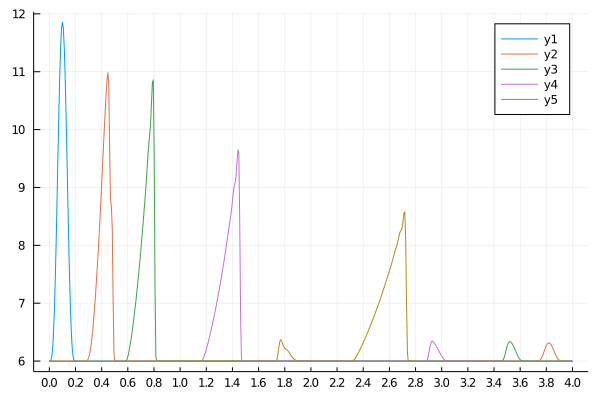

In [34]:
t = 4
U=10
M=600
L=4
dx = L/599
x = 0:L/599:dx*599
field = 1
plot(x,reshape(sol(0.),(M,U))[:,field],xticks = 0:0.2:10)
plot!(x,reshape(sol(t/8),(M,U))[:,field])
plot!(x,reshape(sol(t/4),(M,U))[:,field])
plot!(x,reshape(sol(t/2),(M,U))[:,field])
plot!(x,reshape(sol(t/1),(M,U))[:,field])

In [29]:
c1 = (2.22 - 0.1)/4

0.53

In [30]:
c2 = (3.35 - 0.1)/4


0.8125

## Velocity approximations

With **solright_p**     e0 = 6.; δe = 0.1    x0 = 0.; x1 = 0.2  λ = 1. /sqrt(3.) χ = [- 1.0; - 0.5; - 5.0]

    1. c1 = 0.53 *this is the sound speed, around (0.57735) for radiation
    2. c2 = 0.81